# Import the preprocessing data

In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
# Load dataset
df = pd.read_csv('trainfraud.csv')


print('Shape of dataframe:', df.shape)
df.head()

Shape of dataframe: (1879, 10)


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [3]:
df.dtypes

trustLevel                     int64
totalScanTimeInSeconds         int64
grandTotal                   float64
lineItemVoids                  int64
scansWithoutRegistration       int64
quantityModifications          int64
scannedLineItemsPerSecond    float64
valuePerSecond               float64
lineItemVoidsPerPosition     float64
fraud                          int64
dtype: object

Because the data type is different, it will be equated with the `astype()` function

In [4]:
df = df = df.astype(int)

In [5]:
df.dtypes

trustLevel                   int32
totalScanTimeInSeconds       int32
grandTotal                   int32
lineItemVoids                int32
scansWithoutRegistration     int32
quantityModifications        int32
scannedLineItemsPerSecond    int32
valuePerSecond               int32
lineItemVoidsPerPosition     int32
fraud                        int32
dtype: object

## Missing Value
In some cases, data may have missing values in some columns, this can be caused by several reasons such as human error. We can use the is_null() function from the Pandas library to check for missing data and then use the sum() function to see the total missing values in each column

In [6]:
df.isnull().sum()

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

From these results I can be sure that the data has no lost value and is ready to use.

# Class Distribution
In this case where the expected class is split into two outcomes, '1 = yes' and '0 = no', an 80:20 class distribution can be considered ideal.

In [7]:
df['fraud'].value_counts()

fraud
0    1775
1     104
Name: count, dtype: int64

Because the number can be said to be 1: 100, the class becomes unbalanced or unbalanced, it is necessary to carry out a process to produce a better model 

## Scale Numeric Data
I would scale the numeric data to avoid the presence of outliers that could significantly affect our model. Using sklearn's StandardScaler() function can scale any column containing numeric data

In [8]:
# copy dataset
df_ready = df.copy()
df_ready = df_ready.drop(['fraud'],axis=1)
df_ready

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,5,1054,54,7,0,3,0,0,0
1,3,108,27,5,2,4,0,0,0
2,3,1516,62,3,10,5,0,0,0
3,6,1791,92,8,4,4,0,0,0
4,5,430,81,3,7,2,0,0,0
...,...,...,...,...,...,...,...,...,...
1874,1,321,76,8,7,2,0,0,0
1875,1,397,41,5,5,0,0,0,0
1876,4,316,41,5,8,1,0,0,0
1877,2,685,62,1,6,2,0,0,0


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
colums = ['trustLevel','totalScanTimeInSeconds','grandTotal','lineItemVoids','scansWithoutRegistration','quantityModifications','scannedLineItemsPerSecond','valuePerSecond','lineItemVoidsPerPosition']
df_ready[colums] = scaler.fit_transform(df_ready[colums])

df_ready.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,0.935189,0.229898,0.125538,0.443466,-1.562415,0.280068,-0.076406,-0.08093,-0.332514
1,-0.235121,-1.554996,-0.808049,-0.136202,-0.925241,0.870031,-0.076406,-0.08093,-0.332514
2,-0.235121,1.101590,0.402157,-0.715870,1.623453,1.459994,-0.076406,-0.08093,-0.332514
3,1.520344,1.620455,1.439476,0.733300,-0.288068,0.870031,-0.076406,-0.08093,-0.332514
4,0.935189,-0.947453,1.059125,-0.715870,0.667693,-0.309895,-0.076406,-0.08093,-0.332514


# Select Feature Target
Data that was 1:100 will be changed to 80:20. X as Feature and Y as Target

In [10]:
# Features
feature = df_ready
#the dataset that contains X columns is now called to features
#Target is Y
# Target
target = df['fraud']

In [11]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1503, 9)
(376, 9)
(1503,)
(376,)


The result is that the training data has 1503 rows and 376 for testing data.

# Modeling
Here we will try to build 3 different models with different algorithms. In this step we will create a base model for each algorithm using the default parameters set by sklearn and after building all 3 models, the models will be compared to see which one is the best for the case.

## Decision Tree

In [12]:
# Decision Tree model 
from sklearn import tree


dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

 
y_pred_dtc = dtc.predict(X_test)

In [13]:
from sklearn import metrics

# Display confussion matrix
dtc_cm = metrics.confusion_matrix(y_test, y_pred_dtc)
print('Confusion Matrix:\n', dtc_cm)

# Calculate area under curve (AUC)
y_pred_dtc_proba = dtc.predict_proba(X_test)[::,1]
dtc_fpr, dtc_tpr, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
dtc_auc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
print('Area Under Curve:', dtc_auc)

# Calculate accuracy, precision, recall, f1-score, and kappa score
dtc_acc = metrics.accuracy_score(y_test, y_pred_dtc)
dtc_prec = metrics.precision_score(y_test, y_pred_dtc)
dtc_rec = metrics.recall_score(y_test, y_pred_dtc)
dtc_f1 = metrics.f1_score(y_test, y_pred_dtc)


print('Accuracy:', dtc_acc)
print('Precision:', dtc_prec)
print('Recall:', dtc_rec)
print('F1 Score:', dtc_f1)

Confusion Matrix:
 [[339  14]
 [ 11  12]]
Area Under Curve: 0.7410395368887794
Accuracy: 0.9335106382978723
Precision: 0.46153846153846156
Recall: 0.5217391304347826
F1 Score: 0.4897959183673469


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train.values, y_train.values)
 
y_pred_rf = rf.predict(X_test.values)



In [15]:
# Display confussion matrix
rf_cm = metrics.confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:\n', rf_cm)

# Calculate area under curve (AUC)
y_pred_rf_proba = rf.predict_proba(X_test)[::,1]
rf_fpr, rf_tpr, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
rf_auc = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print('Area Under Curve:', rf_auc)

# Calculate accuracy, precision, recall, f1-score
rf_acc = metrics.accuracy_score(y_test, y_pred_rf)
rf_prec = metrics.precision_score(y_test, y_pred_rf)
rf_rec = metrics.recall_score(y_test, y_pred_rf)
rf_f1 = metrics.f1_score(y_test, y_pred_rf)


print('Accuracy:', rf_acc)
print('Precision:', rf_prec)
print('Recall:', rf_rec)
print('F1 Score:', rf_f1)




Confusion Matrix:
 [[346   7]
 [ 19   4]]
Area Under Curve: 0.9350905283901959
Accuracy: 0.9308510638297872
Precision: 0.36363636363636365
Recall: 0.17391304347826086
F1 Score: 0.2352941176470588


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## Naive Bayes


In [16]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)


y_pred_nb = nb.predict(X_test)

In [17]:
# Display confussion matrix
nb_cm = metrics.confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:\n', nb_cm)

# Calculate area under curve (AUC)
y_pred_nb_proba = nb.predict_proba(X_test)[::,1]
nb_fpr, nb_tpr, _ = metrics.roc_curve(y_test,  y_pred_nb_proba)
nb_auc = metrics.roc_auc_score(y_test, y_pred_nb_proba)
print('Area Under Curve:', nb_auc)

# Calculate accuracy, precision, recall, f1-score
nb_acc = metrics.accuracy_score(y_test, y_pred_nb)
nb_prec = metrics.precision_score(y_test, y_pred_nb)
nb_rec = metrics.recall_score(y_test, y_pred_nb)
nb_f1 = metrics.f1_score(y_test, y_pred_nb)


print('Accuracy:', nb_acc)
print('Precision:', nb_prec)
print('Recall:', nb_rec)
print('F1 Score:', nb_f1)


Confusion Matrix:
 [[230 123]
 [  0  23]]
Area Under Curve: 0.9547358049020815
Accuracy: 0.6728723404255319
Precision: 0.15753424657534246
Recall: 1.0
F1 Score: 0.27218934911242604


# Comparison of Models
After creating all the models, you can now compare how well each model performs. To do this, two charts will be created, the first is a bar chart grouped to display the values for accuracy, precision, gain, f1, and the kappa score of our model, and the second is a line chart to show the APC of all our models

C:\Users\admin\AppData\Local\Temp\ipykernel_17108\1140282005.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


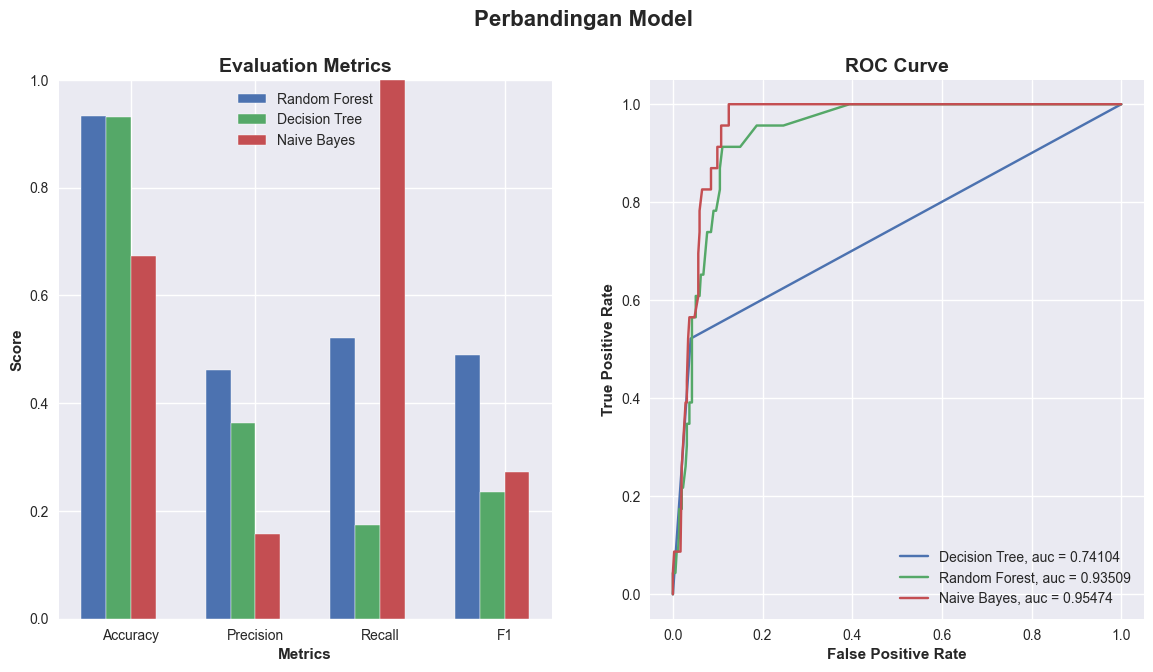

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Perbandingan Model', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_acc, dtc_prec, dtc_rec, dtc_f1]
rf_score = [rf_acc, rf_prec, rf_rec, rf_f1]
nb_score = [nb_acc, nb_prec, nb_rec, nb_f1]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_fpr, dtc_tpr, label='Decision Tree, auc = {:0.5f}'.format(dtc_auc))
ax2.plot(rf_fpr, rf_tpr, label='Random Forest, auc = {:0.5f}'.format(rf_auc))
ax2.plot(nb_fpr, nb_tpr, label='Naive Bayes, auc = {:0.5f}'.format(nb_auc))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

From the figure above, it can be seen that the Random Forest model tops the other models in 4 of the 6 metrics evaluated, except for recall and AUC. So we can assume that Random Forest is the right choice to solve this case.

 Tuning Parameters using Grid Search Cross Validation
We will use sklearn's GridSearchCV function to find the optimal parameters for the Random Forest model. give the base model the name rf_grids. The GridSearchCV function will iterate over each parameter combination to find the best scoring parameter.

In [21]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500, 750, 1000]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


{'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

After finding the best parameters for the model, we can access the best_estimator_ attribute of the GridSearchCV object to save the optimized model into a variable called best_grid. After that, the 6 evaluation metrics will be compared with the initial model.

In [22]:
best_grid = grid_search.best_estimator_
best_grid_pred = best_grid.predict(X_test)


# Calculate accuracy, precision, recall, f1-score, and kappa score
best_grid_acc = metrics.accuracy_score(y_test, best_grid_pred)
best_grid_prec = metrics.precision_score(y_test, best_grid_pred)
best_grid_rec = metrics.recall_score(y_test, best_grid_pred)
best_grid_f1 = metrics.f1_score(y_test, best_grid_pred)
best_grid_kappa = metrics.cohen_kappa_score(y_test, best_grid_pred)

# Calculate area under curve (AUC)
best_grid_pred_proba = best_grid.predict_proba(X_test)[::,1]
best_grid_fpr, best_grid_tpr, _ = metrics.roc_curve(y_test,  best_grid_pred_proba)
best_grid_auc = metrics.roc_auc_score(y_test, best_grid_pred_proba)

# The final result

In [24]:
df ['fraud_prediction'] = rf.predict(feature)

df.head(20)

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,fraud_prediction
0,5,1054,54,7,0,3,0,0,0,0,0
1,3,108,27,5,2,4,0,0,0,0,0
2,3,1516,62,3,10,5,0,0,0,0,0
3,6,1791,92,8,4,4,0,0,0,0,0
4,5,430,81,3,7,2,0,0,0,0,0
5,1,770,11,11,5,2,0,0,0,1,1
6,3,294,55,2,7,1,0,0,0,0,0
7,2,1545,22,0,8,4,0,0,0,0,0
8,6,962,65,7,0,2,0,0,0,0,0
9,2,725,41,10,2,4,0,0,0,0,0


# CONCLUSION

In [25]:
# Calculate accuracy, precision, recall, f1-score
best_grid_acc = metrics.accuracy_score(y_test, best_grid_pred)
best_grid_prec = metrics.precision_score(y_test, best_grid_pred)
best_grid_rec = metrics.recall_score(y_test, best_grid_pred)
best_grid_f1 = metrics.f1_score(y_test, best_grid_pred)


# Calculate area under curve (AUC)
best_grid_pred_proba = best_grid.predict_proba(X_test)[::,1]
best_grid_fpr, best_grid_tpr, _ = metrics.roc_curve(y_test,  best_grid_pred_proba)
best_grid_auc = metrics.roc_auc_score(y_test, best_grid_pred_proba)

print('Accuracy:', best_grid_acc)
print('Precision:', best_grid_prec)
print('Recall:', best_grid_rec)
print('F1 Score:', best_grid_f1)




Accuracy: 0.9281914893617021
Precision: 0.35714285714285715
Recall: 0.21739130434782608
F1 Score: 0.27027027027027023


For a simple model, it can be seen that our model performs data classification well and has been optimized using GridSearchCV which means reaching the limit with this model

# Prediction test & User Interface

In [26]:
input_array=np.array([[6,1397,62.59,7,9,4,0.0178954903364352,0.0448031496062992,0.28]])
pred = dtc.predict(input_array)
if  pred == 1:
        print("Fraud")
elif pred==0:
        print("Not Fraud")


Not Fraud


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
